In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
agedf=pd.read_csv("zip_age.csv")

In [3]:
agedf.drop(agedf[agedf['QUANTITY'] >= 110000 ].index , inplace=True)

In [4]:
# print(agedf)

In [5]:
agedf['BUYER_ZIP']=agedf['BUYER_ZIP'].astype(str)

In [6]:
agedf['QUANTITY']=agedf['QUANTITY'].astype(np.float64)

In [7]:
agedf['QUANTITY'].describe()

count     14238.000000
mean       4832.938826
std        6445.587780
min           1.000000
25%         820.000000
50%        2655.500000
75%        6457.750000
max      105481.000000
Name: QUANTITY, dtype: float64

### Convert Quantity to Categorical variable

In [8]:
def qant_cat(q):
    if q>=2655.50:
        q='H'
    elif q<=820.00:
        q='L'
    else:
        q='M'
    return(q)
        
        

In [9]:
agedf['QUANTITY']=[qant_cat(word) for word in agedf['QUANTITY']]

In [ ]:
agedf['QUANTITY'].value_counts()

In [12]:
# agedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14238 entries, 0 to 14241
Data columns (total 12 columns):
BUYER_ZIP    14238 non-null object
QUANTITY     14238 non-null object
under_18     14238 non-null float64
18_24        14238 non-null float64
25_34        14238 non-null float64
35_44        14238 non-null float64
45_54        14238 non-null float64
55_64        14238 non-null float64
65_over      14238 non-null float64
65_74        14238 non-null float64
75_84        14238 non-null float64
85_over      14238 non-null float64
dtypes: float64(10), object(2)
memory usage: 1.4+ MB


In [16]:
df=pd.DataFrame(agedf, columns=agedf.columns[2:9])
y=agedf.QUANTITY

### Decision Tree

* The intention to plot DT is to mine any pattern of combinations of variable that might lead to high consumption.  

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_leaf_nodes=10)
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
from dtreeplt import dtreeplt

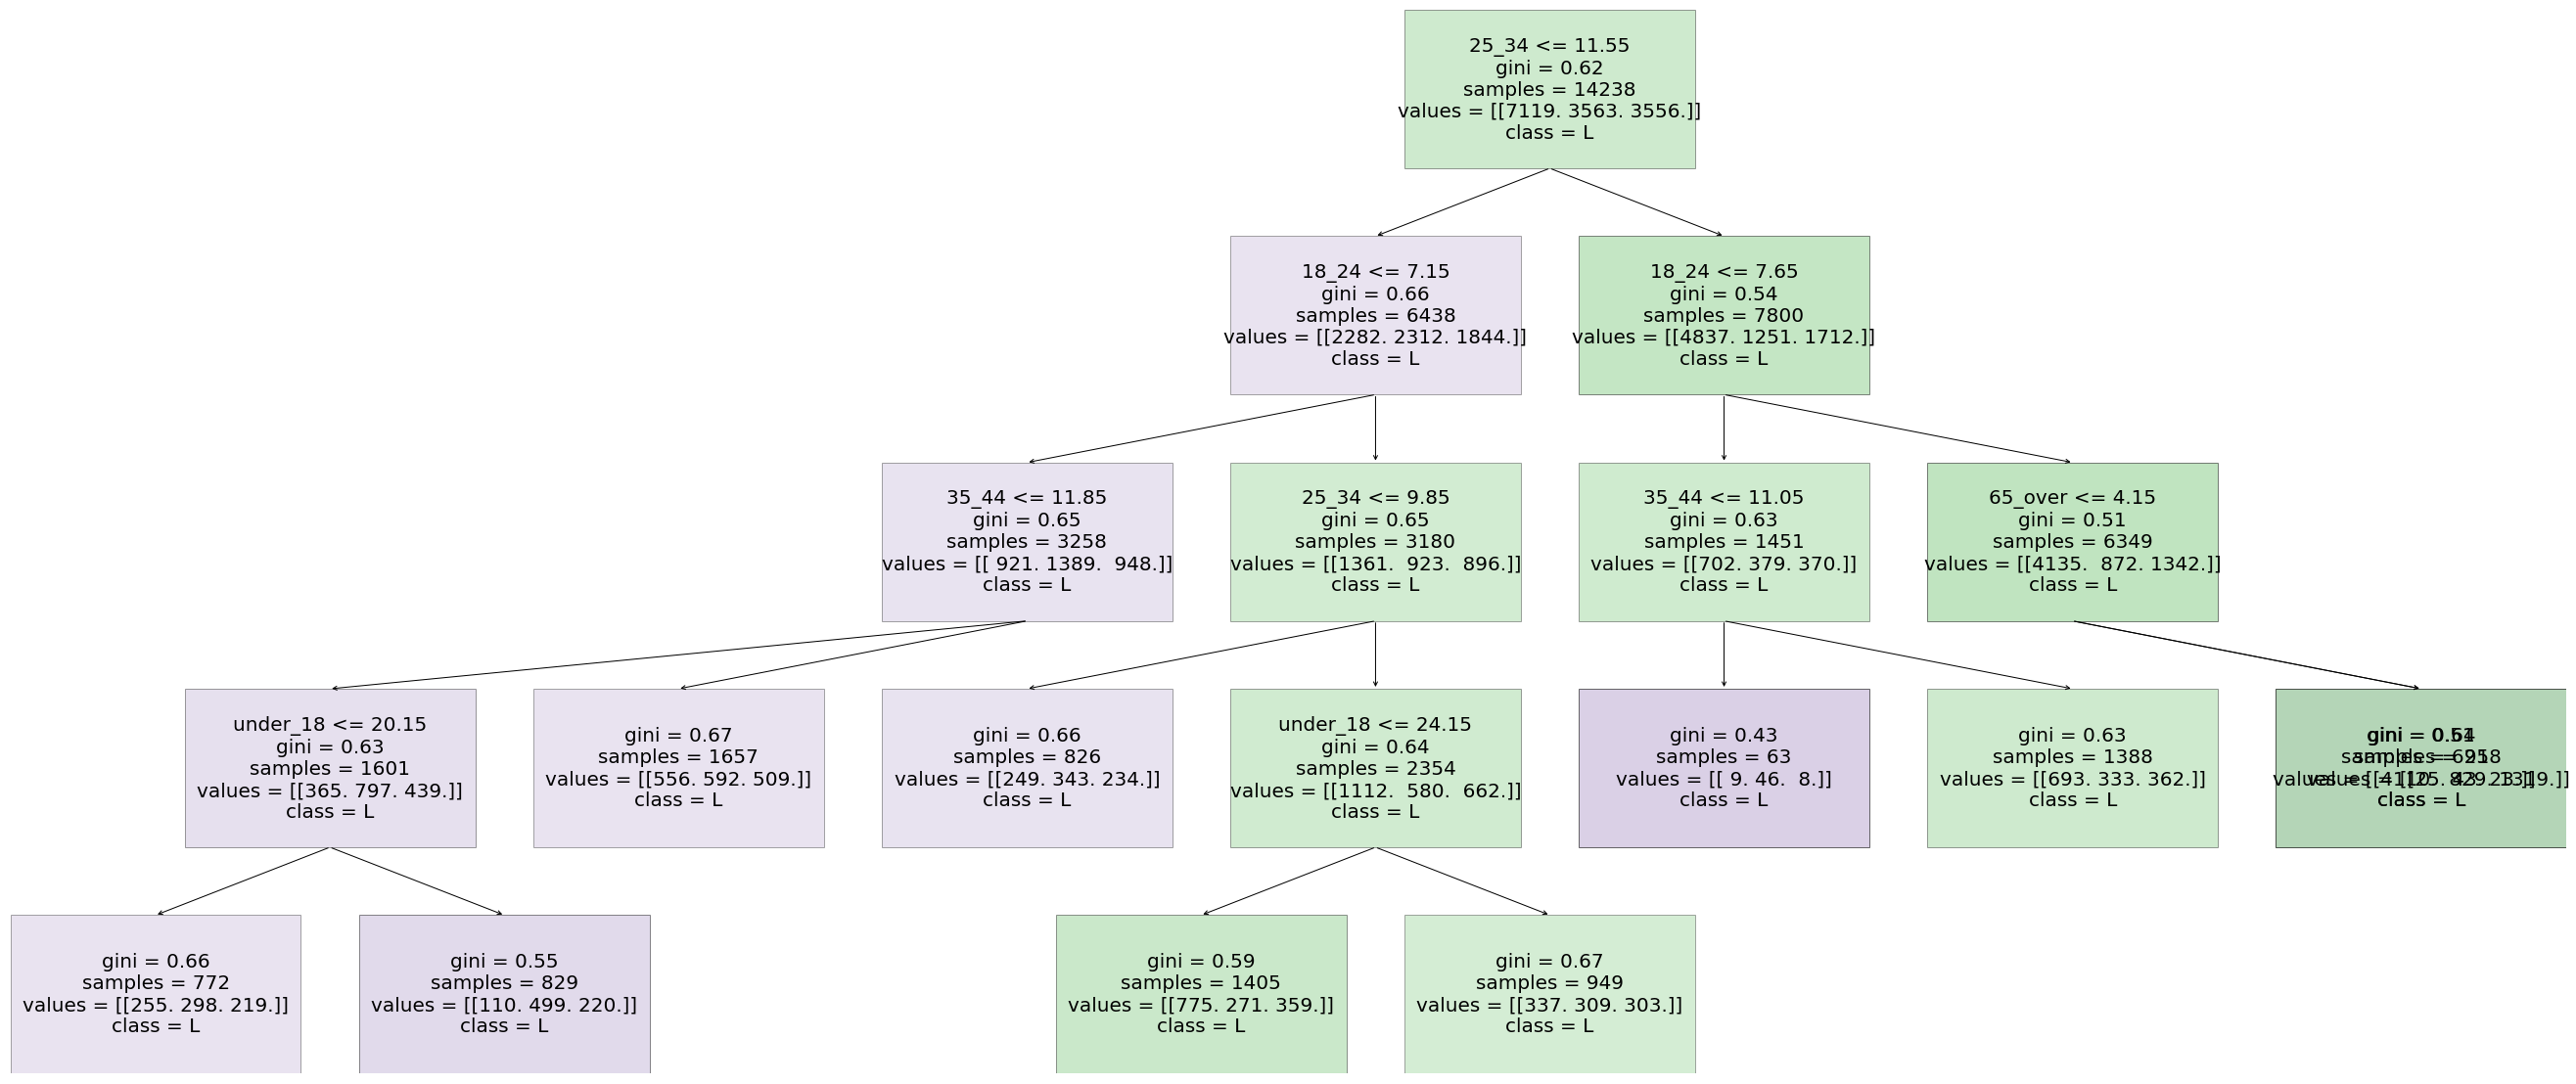

In [19]:
dtree = dtreeplt(
    model=dtree,
    feature_names=agedf.columns[2:9],
    target_names=y)
fig = dtree.view()

In [20]:
fig.savefig('output.png')

### Finding the top 10 zip codes with the highest quantity of sell in 2010

In [24]:
top10=pd.read_csv("top10.csv")

In [25]:
print(top10.sort_values('QUANTITY',ascending = False).head(10))

          BUYER_ZIP  QUANTITY
24596638      90505     30000
25397003      91436     11940
18050884      91402     11100
5479018       91436      9000
20685889      91403      9000
7766272       90505      9000
11774752      91402      7980
16464699      37129      7499
8118737       94550      6240
18446074      94550      6240
